In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('data_6_stopmotion.xls')

In [3]:
display(df.head())


,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s)
0,0.036856,0.235095,9.643075,1.026222,-0.034284,0.001451,0.003436
1,0.039269,0.220738,9.619147,0.992722,-0.030619,0.007559,0.002825
2,0.041683,0.220738,9.619147,0.952044,-0.029397,0.012446,0.000382
3,0.044096,0.218345,9.583255,0.911366,-0.028175,0.016722,-0.002672
4,0.046509,0.232702,9.597611,0.887438,-0.033062,0.020998,-0.003894


In [4]:
np_df = df.to_numpy()

In [5]:
accelerations = [[],[],[]]
angle_speeds = [[],[],[]]

In [6]:
for frame in np_df:
        accelerations[0].append(frame[1])
        accelerations[1].append(frame[2])
        accelerations[2].append(frame[3])

        angle_speeds[0].append(frame[4])
        angle_speeds[1].append(frame[5])
        angle_speeds[2].append(frame[6])

In [7]:
def moving_average_cumsum(data, window_size):
    cumsum_vec = np.cumsum(np.insert(data, 0, 0))
    return (cumsum_vec[window_size:] - cumsum_vec[:-window_size]) / window_size

In [8]:
def treshold(data, treshold):
        for i in range(len(data)):
                if abs(data[i]) < treshold:
                        data[i] = 0
        
        return data

In [9]:
def unbais (rdata):
        data = rdata
        for i in range(len(data)):
                data[i] -= np.mean(data)
        return data

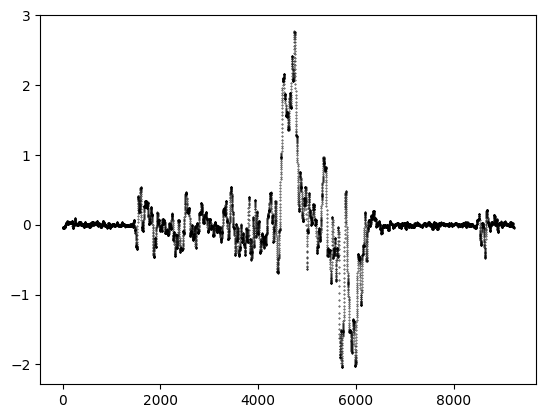

In [68]:
f_test = moving_average_cumsum(angle_speeds[0],225)
plt.scatter(range(len(angle_speeds[0])), angle_speeds[0], s = 0.5, marker = '.', c ='k')

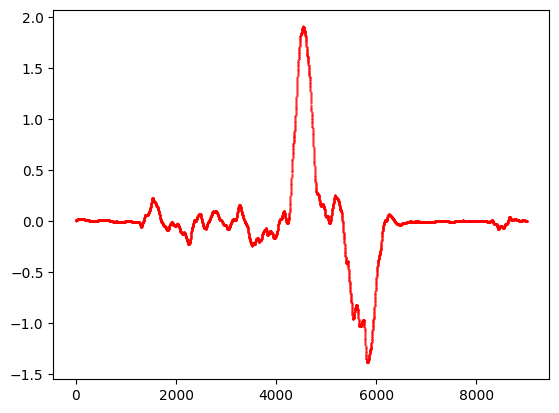

In [69]:
plt.scatter(range(len(f_test)), f_test, s = 0.5, marker = '.', c ='r')
f_test_2 = unbais(f_test)

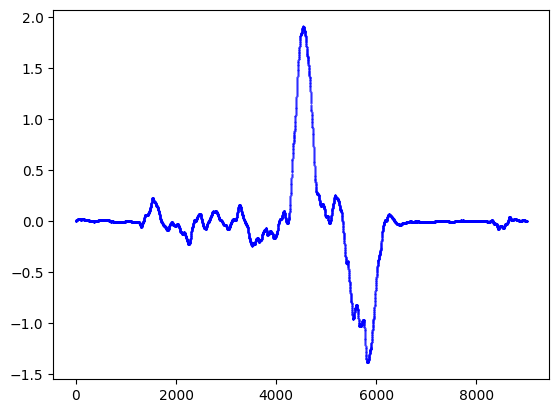

In [70]:
plt.scatter(range(len(f_test_2)), f_test_2, s = 0.5, marker = '.', c ='b')
f_test_3 = treshold(f_test_2, 0.12 * max(f_test_2))

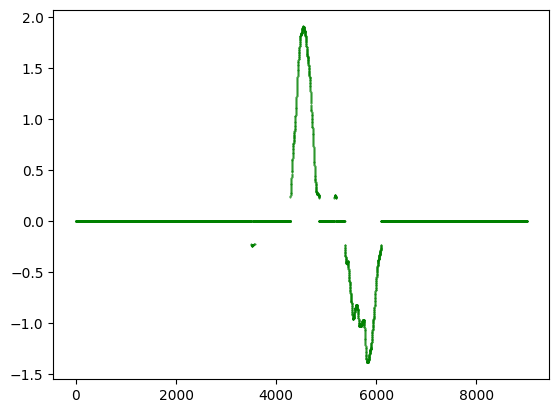

In [71]:
plt.scatter(range(len(f_test_3)), f_test_3, s = 0.5, marker = '.', c ='g')

In [72]:
np.mean(f_test_3)

np.float64(0.005113198997334395)

In [76]:
w = -1
loss = 1
ovf_rate = 0
for i in range(100,300):
    if ovf_rate == 20:
        break
    f_test = moving_average_cumsum(angle_speeds[0],i)
    f_test_2 = unbais(f_test)
    f_test_3 = treshold(f_test_2, 0.12 * max(f_test_2))
    if np.mean(f_test_3) < loss:
        loss = np.mean(f_test_3)
        w = i
        ovf_rate = 0
    else:
        ovf_rate += 1
print(w, " -> ", loss)

225  ->  0.005113198997334395


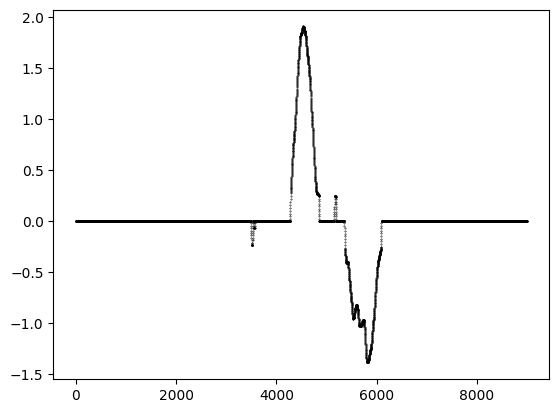

In [73]:
f_test4 = moving_average_cumsum(f_test_3,10)
plt.scatter(range(len(f_test4)), f_test4, s = 0.5, marker = '.', c ='k')

In [74]:
np.mean(f_test)


np.float64(0.005113198997334395)

In [169]:
def MUT_filter (data, t = 0.15):
    w = -1
    loss = 1
    ovf_rate = 0
    for i in range(100,400):
        if ovf_rate == 20:
            break
        l1 = moving_average_cumsum(data,i)
        l2 = unbais(l1)
        l3 = treshold(l2, 0.12 * max(l2))
        if np.mean(l3) < loss:
            loss = np.mean(l3)
            w = i
            ovf_rate = 0
        else:
            ovf_rate += 1
    
    ########################
    l4 = moving_average_cumsum(l3,int(w/2))
    delta_scale = (max(data)-min(data)) / (max(l4)-min(l4))
    print(loss, w)
    
    wtf_lost = len(data) - len(l4)
    l4 = np.append(l4, [0] * int(wtf_lost/2)) 
    l4 = np.append([0] * int(np.ceil(wtf_lost/2)), l4)
        
    return l4 * delta_scale

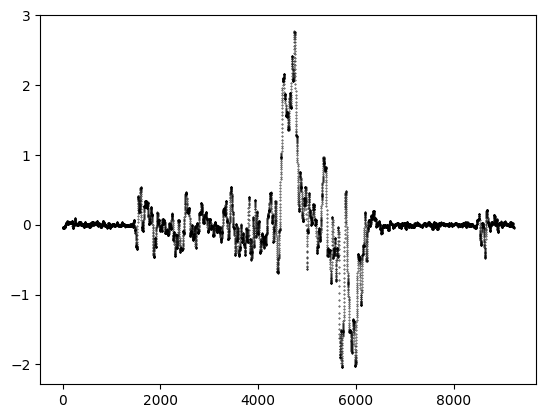

In [115]:
plt.scatter(range(len(angle_speeds[0])), angle_speeds[0], s = 0.5, marker = '.', c ='k')

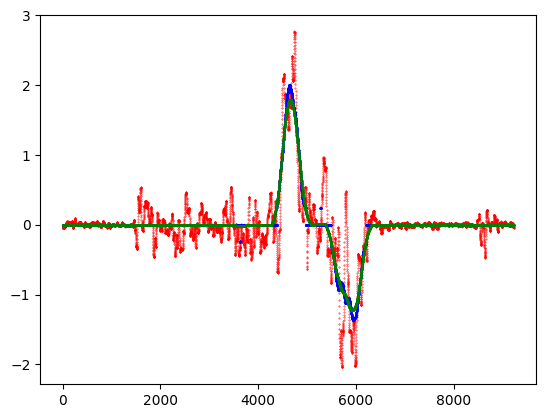

In [161]:
#mut = MUT_filter(angle_speeds[0])


plt.scatter(range(len(angle_speeds[0])), angle_speeds[0], s = 0.5, marker = '.', c ='r')
plt.scatter(range(len(mut)), mut, s = 1, marker = '.', c ='b')


0.005113198997334395 225


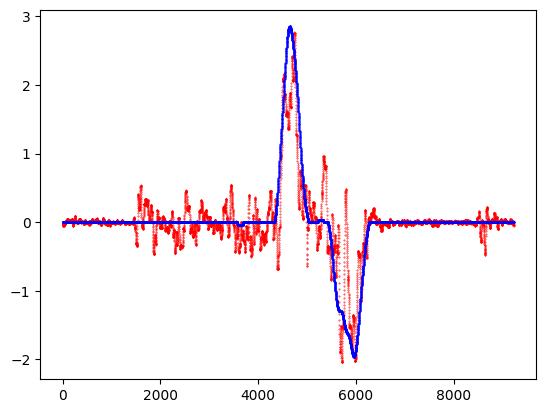

In [170]:
mut = MUT_filter(angle_speeds[0])


plt.scatter(range(len(angle_speeds[0])), angle_speeds[0], s = 0.5, marker = '.', c ='r')
plt.scatter(range(len(mut)), mut, s = 1, marker = '.', c ='b')


112 113.0
